In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from fxpmath import Fxp

In [2]:
n_word = 16
n_frac = 14
IMAGE_SIZE = (50, 80)
NUM_BLOBS = 1
CROP_BOX_ROWS = 20
CROP_BOX_COLS = 20

In [3]:
fpath_tb_image = os.path.join("tb_data", f"tb_image_INDEX_{IMAGE_SIZE[0]}x{IMAGE_SIZE[1]}_{NUM_BLOBS}crops_{CROP_BOX_ROWS}x{CROP_BOX_COLS}_ap_fixed_{n_word}_{n_word-n_frac}.bin")
fpath_tb_image_read_in = os.path.join("tb_data", f"tb_image_INDEX_READ_IN_{IMAGE_SIZE[0]}x{IMAGE_SIZE[1]}_{NUM_BLOBS}crops_{CROP_BOX_ROWS}x{CROP_BOX_COLS}_ap_fixed_{n_word}_{n_word-n_frac}.bin")
fpath_tb_output = os.path.join("tb_data", f"OUTPUT_INDEX_{IMAGE_SIZE[0]}x{IMAGE_SIZE[1]}_{NUM_BLOBS}crops_{CROP_BOX_ROWS}x{CROP_BOX_COLS}_ap_fixed_{n_word}_{n_word-n_frac}.bin")

In [4]:
print(fpath_tb_output)

tb_data\OUTPUT_INDEX_50x80_1crops_20x20_ap_fixed_16_2.bin


# Load testbench data 

from binary

In [5]:
# ap_fixed_16_2_example = Fxp(0.1, signed=True, n_word=16, n_frac=14)
ap_fixed_16_16_example = Fxp(0.1, signed=True, n_word=16, n_frac=0)


# tb_image = np.zeros((50*80), dtype=np.float32)
tb_image = np.zeros((50*80), dtype=np.int32)
with open(fpath_tb_image, 'rb') as f:
    # x = Fxp('0b' + f.read())
    for i, line in enumerate(f.readlines()):
        # x = Fxp('0b' + line)
        x = str(line)
        # x = x.replace("\\r\\n", "")
        x = x.replace("\\n", "")
        x = x.replace("b'", "")
        x = x.replace("'", "")
        print(x)
        x = Fxp('0b' + x, like = ap_fixed_16_16_example)
        tb_image[i] = x

# tb_image = tb_image.reshape((50,80))
# plt.imshow(tb_image, cmap='hot')
print(tb_image)


0000000000000000
0000000000000001
0000000000000010
0000000000000011
0000000000000100
0000000000000101
0000000000000110
0000000000000111
0000000000001000
0000000000001001
0000000000001010
0000000000001011
0000000000001100
0000000000001101
0000000000001110
0000000000001111
0000000000010000
0000000000010001
0000000000010010
0000000000010011
0000000000010100
0000000000010101
0000000000010110
0000000000010111
0000000000011000
0000000000011001
0000000000011010
0000000000011011
0000000000011100
0000000000011101
0000000000011110
0000000000011111
0000000000100000
0000000000100001
0000000000100010
0000000000100011
0000000000100100
0000000000100101
0000000000100110
0000000000100111
0000000000101000
0000000000101001
0000000000101010
0000000000101011
0000000000101100
0000000000101101
0000000000101110
0000000000101111
0000000000110000
0000000000110001
0000000000110010
0000000000110011
0000000000110100
0000000000110101
0000000000110110
0000000000110111
0000000000111000
0000000000111001
00000000001110

# Load the data that was read by verilog module

In [6]:
n_x_read = 0

dest_idx = 0

# tb_image_read_in = np.zeros((50*80), dtype=np.float32)
tb_image_read_in = np.zeros((50*80), dtype=np.int32)

with open(fpath_tb_image_read_in, 'rb') as f:
    for i, line in enumerate(f.readlines()):
        if "x" in str(line):
            n_x_read += 1
            continue
        x = str(line)
        x = x.replace("\\n", "")
        x = x.replace("b'", "")
        x = x.replace("'", "")
        x = Fxp('0b' + x, like = ap_fixed_16_16_example)
        tb_image_read_in[dest_idx] = x
        dest_idx += 1

# tb_image_read_in = tb_image_read_in.reshape((50,80))
# plt.imshow(tb_image_read_in, cmap='hot')
print(tb_image_read_in)

[   0    1    2 ... 3997 3998 3999]


In [7]:
sum(tb_image==tb_image_read_in)

4000

Beautiful - so we're reading in the data correctly. 

# Load the output of the verilog module

In [8]:
with open(fpath_tb_output, 'rb') as f:
    print(len(f.readlines()))

400


In [9]:
# fpath_tb_output = os.path.join("tb_data", "OUTPUT_50x80_1crops_20x20_ap_fixed_16_2.bin")

In [10]:
n_x_out = 0
dest_idx = 0
# tb_image_output = np.zeros((1*20*20), dtype=np.float32)
tb_image_output = np.zeros((1*20*20), dtype=np.int32)
with open(fpath_tb_output, 'rb') as f:
    for i, line in enumerate(f.readlines()):
        if "x" in str(line):
            n_x_out += 1
            continue
        x = str(line)
        x = x.replace("\\n", "")
        x = x.replace("b'", "")
        x = x.replace("'", "")
        x = Fxp('0b' + x, like = ap_fixed_16_16_example)
        tb_image_output[dest_idx] = x
        dest_idx += 1

# fig, axes = plt.subplots(1, 1, figsize=(10, 10))
# tb_image_output = tb_image_output.reshape((1, 20, 20))
# for i in range(tb_image_output.shape[0]):
#     axes.imshow(tb_image_output[i], cmap='hot')
print(tb_image_output)

[1390 1391 1392 1393 1394 1395 1396 1397 1398 1399 1400 1401 1402 1403
 1404 1405 1406 1407 1408 1409 1470 1471 1472 1473 1474 1475 1476 1477
 1478 1479 1480 1481 1482 1483 1484 1485 1486 1487 1488 1489 1550 1551
 1552 1553 1554 1555 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565
 1566 1567 1568 1569 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1710 1711 1712 1713
 1714 1715 1716 1717 1718 1719 1720 1721 1722 1723 1724 1725 1726 1727
 1728 1729 1790 1791 1792 1793 1794 1795 1796 1797 1798 1799 1800 1801
 1802 1803 1804 1805 1806 1807 1808 1809 1870 1871 1872 1873 1874 1875
 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 2030 2031 2032 2033 2034 2035 2036 2037
 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2110 2111
 2112 2113 2114 2115 2116 2117 2118 2119 2120 2121 2122 2123 2124 2125
 2126 

In [11]:
n_x_out

0

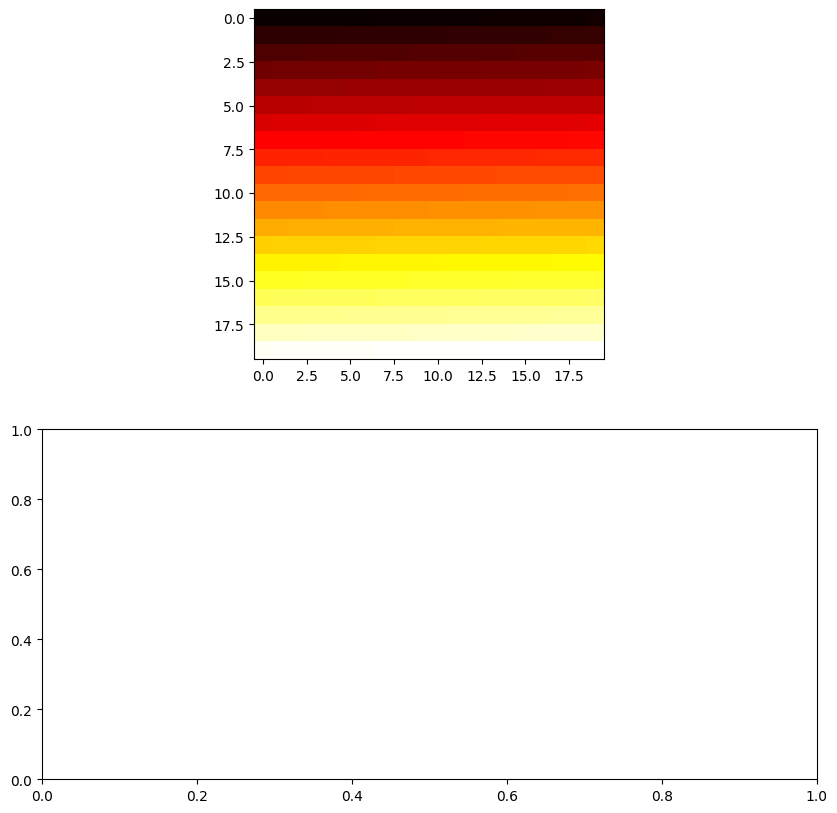

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
tb_image_output = tb_image_output.reshape((NUM_BLOBS, 20, 20))
for i in range(tb_image_output.shape[0]):
    axes[i].imshow(tb_image_output[i], cmap='hot')